# **AP157 Machine Learning Lab Assignment** 
## Module 1: Regression -- Overfitting, Underfitting, and Cross-Validation

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This assignment is based on Chapter 8.11 of “Statistics, Data Mining, and Machine Learning in Astronomy” (SDMMLA) by Zeljko Ivezic et al.

### Student Information 

_Full Name (Last Name, First Name)_: Espalmado, Faye\
_Student No._: 2018-11616\
_Section_: WFU-FX

### Submission Information

_Date and Time Submitted (most recent upload)_: June 16, 2021 5:00 PM 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Faye D. Espalmado** 

### Grading Information (c/o Instructor)

TOTAL SCORE: **100**/100 - Great work!

Score breakdown:
* Part 1 - []/20
* Part 2 - []/80

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#### PART 1 - Generate data set *(20 points)*

1. Generate a toy data set with 100 regularly-spaced points and as described by Eq. 8.75-- a simple model where $x$ and $y$ satisfy the following:
$$ 0 \le x_i \le 3 $$
$$ y_i = x_i \sin(x_i) + \epsilon_i $$
where the noise is drawn from a normal distribution $\epsilon_i \sim \rm{N}(0, 0.1)$. *(10 points)*  

2. Plot your toy data set (Refer to Fig. 8.12 for comparison). *(10 points)*


**1.** The `np.linspace()` function generates 100 random data from 0 to 3. The error is then defined as `epsilon` then used the `np.random.normal()` function to draw random samples from a normal distribution with a mean of 0 and standard deviation of 0.1.

In [ ]:
#constants
a = 0
b = 3
N = 100

x = np.linspace(a, b, N)
epsilon = np.random.normal(0, 0.1, N) 
y = x*np.sin(x) + epsilon

**2.** Here we display the plot for the generated data above.

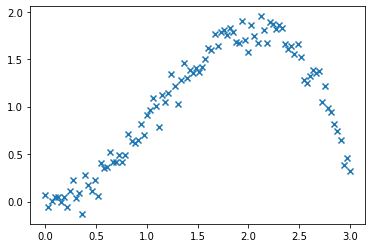

In [ ]:
#plotting the toy data
plt.scatter(x,y,marker= "x")
plt.show()

PART 2 - Apply cross-validation *(80 points)*

Recreate the top panel of Figure 8.14: rms error vs. polynomial degree for the training set and cross-validation set. To do this, you will perform the ff. steps:

1. Split the data set into training, cross-validation, and test sets with 50%, 25% and 25% ratio. You can use sklearn library's model_selection.train_test_split function [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). *(20 pts.)*
2. Get the best-fit curve for polynomial degrees $d=0$ to 14 for the training and cross-validation sets. You can use numpy library's polyfit function [(link)](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). *(30 pts.)*
3. Get the rms error for each. *(10 pts.)*
4. Plot rms error against polynomial degree $d$. *(20 pts.)*


**1.** The `train_test_split()` function is used to get the x and y values for the training, cross-validation, and test sets. The full data is first split 50:50 into testing:training sets by assigning the argument `test_size=0.50`. The resulting testing data is then split again 50:50 into testing:validation sets. Thus the data is finally split into a 50:25:25 training, validation, and training ratio.

In [ ]:
from sklearn.model_selection import train_test_split

# testing:training split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=101)
# testing:validation split
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=101) 

# print proportions
print('y: train: {}% | validation: {}% | test {}%'.format(round(len(y_train)/N,2),
                                                       round(len(y_valid)/N,2),
                                                       round(len(y_test)/N,2)))
print('x: train: {}% | validation: {}% | test {}%'.format(round(len(X_train)/N,2),
                                                       round(len(X_valid)/N,2),
                                                       round(len(X_test)/N,2)))

y: train: 0.5% | validation: 0.25% | test 0.25%
x: train: 0.5% | validation: 0.25% | test 0.25%


**2.** We first initialized the array that would contain the polynomial coefficients. `polyfit()` function is invoked to get the corresponding coefficient for the polynomial degree. This step is contained within a `for n in range(0,15):` loop so that it finds the fit for polynomial degrees from 0 to 14.

In [ ]:
# initialization of the polynomial arrays
p_train = []
p_valid = []

# curve-fitting with d=0 to d=15
for n in range(0,15):
  p_train.append(np.polyfit(X_train, y_train, n))
  p_valid.append(np.polyfit(X_valid, y_valid, n))

Here we just created a function that plots the data sets and the corresponding curve of a polynomial degree input for visualization purposes.

In [ ]:
def train_cv_plot(d):
  plt.plot(x, np.polyval(p_train[d],x), label = 'Training')
  plt.plot(x, np.polyval(p_valid[d],x), label = 'Cross-validation')
  
  plt.scatter(X_train,y_train, marker= "x")
  plt.scatter(X_valid,y_valid, marker= "x")
  

  plt.title("d="+str(d))
  plt.legend()
  plt.show()

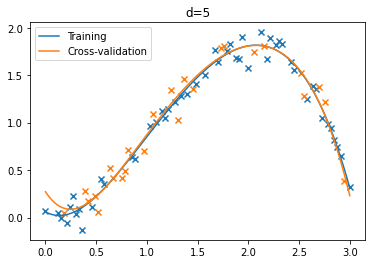

In [ ]:
train_cv_plot(5)

**3.** We defined the function rms() which computes the root mean square error. This is based on the equation $$\sqrt{\frac{\sum^N_{n=1}(\hat{y_i}-y_i)^2}{N}}$$ 
where $\hat{y_i}$ and $y_i$ are the predicted and actual data, respectively. The value for $\hat{y_i}$ is obtained using the `polyval()` function. \
The rmse of the training and validation data sets for each degree is taken in the `for n in range(0,15)` loop  and recorded in arrays.



In [ ]:
def rms(yp, xs, yt):
  rms = np.sqrt(np.sum((np.polyval(yp, xs) - yt)**2)/N)
  return rms

rms_train = []
rms_valid = []

for n in range(0,15):
  rms_train.append(rms(p_train[n], x, y))
  rms_valid.append(rms(p_valid[n], x, y))

**4.** The rms error for the training and cross-validation sets was plotted against the polynomial degree. We also included the line indicating the standard deviation of 0.1 for the noise we have set in the beginning. 
We observe that the training set stabilizes at near this value for d=3 and higher. \
For this particular data set, we see that the cross-validation set error is minimal at degrees between 3 and 5.  We also see the bias-variance tradeoff, wherein there is higher bias at the smaller degrees and the higher variance at larger degrees. From the plot, we can infer that the model is optimal at degrees between 3 and 5. 


Text(0.5, 0, 'Polynomial degree')

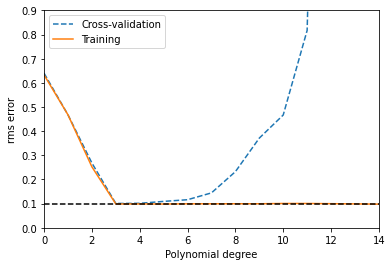

In [ ]:
plt.plot(rms_valid, '--', label = 'Cross-validation')
plt.plot(rms_train, '-', label = 'Training')

plt.axhline(0.1, color='black', linestyle = '--')
plt.ylim(0,0.08)
plt.xlim(0,14)
plt.legend()

plt.yticks(np.arange(0,1,.1))
plt.ylabel('rms error')
plt.xlabel('Polynomial degree')